# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

___

## Exercício 3

## Imports

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf

In [56]:
df_spotify = pd.read_csv('datasets/DadosSpotify.csv', sep=',')

In [57]:
df_spotify.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [58]:
df_spotify.drop(columns=['id', 'song_title', 'artist'], axis=1, inplace=True)

In [59]:
# Coluna artist, usando metodo to_categorical, PD.getDumies

In [60]:
df_spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [61]:
df_spotify.shape

(2017, 14)

In [62]:
df_spotify.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
dtype: object

In [63]:
Y = df_spotify[['target']] #Target
X = df_spotify.drop(['target'], axis=1) #Features

In [64]:
Y.value_counts()

target
1         1020
0          997
dtype: int64

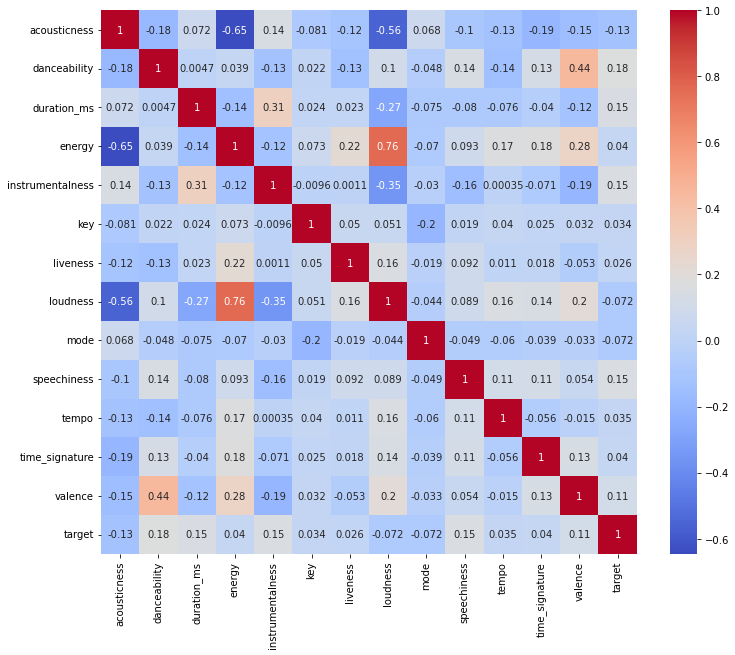

In [65]:
plt.subplots(figsize=(12, 10))
sns.heatmap(df_spotify.corr(), annot=True, cmap="coolwarm");

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [67]:
# Normalizando os dados das features

In [101]:
std_scaler = preprocessing.StandardScaler()
X_train_norm = std_scaler.fit_transform(X_train)

In [102]:
X_test_norm = std_scaler.transform(X_test)

In [70]:
num_features = len(X.columns)

In [71]:
num_classes = 1

In [72]:
# Criando o modelo

In [73]:
# Diminuir a rede para pelo menos dois, calibrando pesos.
# Equação Martin Han..

In [107]:
spotify_classificacao = tf.keras.Sequential();
spotify_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=10, kernel_initializer='uniform'))
spotify_classificacao.add(tf.keras.layers.Dense(activation='relu', input_dim=num_features, units=10))


spotify_classificacao.add(tf.keras.layers.Dense(activation='sigmoid', units=num_classes))
spotify_classificacao.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelos/spotify.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
hist = spotify_classificacao.fit(X_train_norm, y_train, epochs=100, batch_size=8, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/100
130/141 [==========================>...] - ETA: 0s - loss: 0.6805 - accuracy: 0.6038
Epoch 1: val_accuracy improved from -inf to 0.65724, saving model to modelos\spotify.hdf5
141/141 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.6108 - val_loss: 0.6658 - val_accuracy: 0.6572
Epoch 2/100
124/141 [=========================>....] - ETA: 0s - loss: 0.6255 - accuracy: 0.7036
Epoch 2: val_accuracy improved from 0.65724 to 0.66784, saving model to modelos\spotify.hdf5
141/141 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7004 - val_loss: 0.6288 - val_accuracy: 0.6678
Epoch 3/100
104/141 [=====================>........] - ETA: 0s - loss: 0.5830 - accuracy: 0.7031
Epoch 3: val_accuracy did not improve from 0.66784
141/141 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7057 - val_loss: 0.6168 - val_accuracy: 0.6643
Epoch 4/100
122/141 [========================>.....] - ETA: 0s - loss: 0.5660 - ac

Epoch 29/100
116/141 [=======================>......] - ETA: 0s - loss: 0.4774 - accuracy: 0.7565
Epoch 29: val_accuracy did not improve from 0.72792
141/141 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7580 - val_loss: 0.6047 - val_accuracy: 0.7138
Epoch 30/100
133/141 [===========================>..] - ETA: 0s - loss: 0.4769 - accuracy: 0.7716
Epoch 30: val_accuracy did not improve from 0.72792
141/141 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7722 - val_loss: 0.6039 - val_accuracy: 0.7244
Epoch 31/100
116/141 [=======================>......] - ETA: 0s - loss: 0.4773 - accuracy: 0.7737
Epoch 31: val_accuracy did not improve from 0.72792
141/141 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7704 - val_loss: 0.6164 - val_accuracy: 0.6890
Epoch 32/100
130/141 [==========================>...] - ETA: 0s - loss: 0.4755 - accuracy: 0.7673
Epoch 32: val_accuracy did not improve from 0.72792
141/141

Epoch 58/100
127/141 [==========================>...] - ETA: 0s - loss: 0.4512 - accuracy: 0.7766
Epoch 58: val_accuracy improved from 0.73852 to 0.74205, saving model to modelos\spotify.hdf5
141/141 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7793 - val_loss: 0.6071 - val_accuracy: 0.7420
Epoch 59/100
127/141 [==========================>...] - ETA: 0s - loss: 0.4437 - accuracy: 0.7874
Epoch 59: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7855 - val_loss: 0.6306 - val_accuracy: 0.6926
Epoch 60/100
128/141 [==========================>...] - ETA: 0s - loss: 0.4376 - accuracy: 0.7861
Epoch 60: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7846 - val_loss: 0.6179 - val_accuracy: 0.7208
Epoch 61/100
130/141 [==========================>...] - ETA: 0s - loss: 0.4464 - accuracy: 0.7731
Epoch 61: val_acc

123/141 [=========================>....] - ETA: 0s - loss: 0.4257 - accuracy: 0.7947
Epoch 87: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8041 - val_loss: 0.6485 - val_accuracy: 0.7102
Epoch 88/100
128/141 [==========================>...] - ETA: 0s - loss: 0.4124 - accuracy: 0.8105
Epoch 88: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8076 - val_loss: 0.6556 - val_accuracy: 0.7067
Epoch 89/100
120/141 [========================>.....] - ETA: 0s - loss: 0.4081 - accuracy: 0.8042
Epoch 89: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.7979 - val_loss: 0.6515 - val_accuracy: 0.7102
Epoch 90/100
125/141 [=========================>....] - ETA: 0s - loss: 0.4021 - accuracy: 0.8080
Epoch 90: val_accuracy did not improve from 0.74205
141/141 [===========

In [108]:
spotify_classificacao_best = tf.keras.models.load_model('modelos/spotify.hdf5')

In [109]:
test_results = spotify_classificacao_best.evaluate(X_test_norm, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

19/19 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7261
Resultado dos testes - Loss: 0.568966805934906 - Accuracy: 0.7260726094245911%


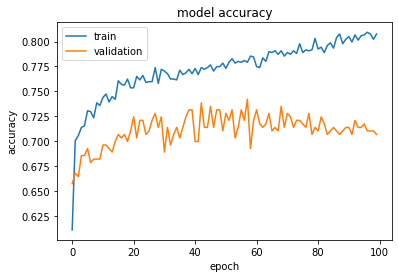

In [115]:
def plot_hist(hist_param):
    plt.figure(1)
    plt.plot(hist_param.history['accuracy'])
    plt.plot(hist_param.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
plot_hist(hist)

In [116]:
spotify_classificacao_best.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 10)                140       
                                                                 
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [112]:
# Tentando melhorar a rede utilizar KerasTuner

In [117]:
#!pip install keras-tuner -q

In [118]:
import keras_tuner

In [172]:
def build_model(hp):
    spotify_classificacao_tuner = tf.keras.Sequential();
    spotify_classificacao_tuner.add(tf.keras.layers.Dense(
                                                          input_dim=num_features,
                                                          kernel_initializer='uniform',
                                                          units=hp.Int("units", min_value=32, max_value=512, step=32),
                                                          activation=hp.Choice("activation", ["relu", "tanh","elu"]),
                                                         ))
    spotify_classificacao_tuner.add(tf.keras.layers.Dense(
                                                          input_dim=num_features,
                                                          units=hp.Int("units", min_value=32, max_value=512, step=32),
                                                          activation=hp.Choice("activation", ["relu", "tanh","elu"]),
                                                         ))
    spotify_classificacao_tuner.add(tf.keras.layers.Dense(activation='sigmoid', units=num_classes))

    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    spotify_classificacao_tuner.compile(
                                            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                            loss="binary_crossentropy",
                                            metrics=["accuracy"],
                                          )
    return spotify_classificacao_tuner

In [173]:
hp = keras_tuner.HyperParameters()
spotify_classificacao_tuner = build_model(hp)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelos/spotify_tuner.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
hist_tuner = spotify_classificacao_tuner.fit(X_train_norm, y_train, epochs=100, batch_size=8, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/100
131/141 [==========================>...] - ETA: 0s - loss: 0.6865 - accuracy: 0.5897
Epoch 1: val_accuracy improved from -inf to 0.56890, saving model to modelos\spotify_turner.hdf5
141/141 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5904 - val_loss: 0.6876 - val_accuracy: 0.5689
Epoch 2/100
120/141 [========================>.....] - ETA: 0s - loss: 0.6786 - accuracy: 0.6396
Epoch 2: val_accuracy improved from 0.56890 to 0.63604, saving model to modelos\spotify_turner.hdf5
141/141 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6427 - val_loss: 0.6818 - val_accuracy: 0.6360
Epoch 3/100
110/141 [======================>.......] - ETA: 0s - loss: 0.6701 - accuracy: 0.6648
Epoch 3: val_accuracy did not improve from 0.63604
141/141 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6658 - val_loss: 0.6754 - val_accuracy: 0.6325
Epoch 4/100
114/141 [=======================>......] - ETA: 0s - los

Epoch 29/100
126/141 [=========================>....] - ETA: 0s - loss: 0.5206 - accuracy: 0.7440
Epoch 29: val_accuracy improved from 0.67138 to 0.68198, saving model to modelos\spotify_turner.hdf5
141/141 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7402 - val_loss: 0.6046 - val_accuracy: 0.6820
Epoch 30/100
125/141 [=========================>....] - ETA: 0s - loss: 0.5230 - accuracy: 0.7420
Epoch 30: val_accuracy did not improve from 0.68198
141/141 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7438 - val_loss: 0.6036 - val_accuracy: 0.6820
Epoch 31/100
127/141 [==========================>...] - ETA: 0s - loss: 0.5271 - accuracy: 0.7382
Epoch 31: val_accuracy improved from 0.68198 to 0.68551, saving model to modelos\spotify_turner.hdf5
141/141 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7456 - val_loss: 0.6024 - val_accuracy: 0.6855
Epoch 32/100
126/141 [=========================>....] - ETA

141/141 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7695 - val_loss: 0.5919 - val_accuracy: 0.6996
Epoch 58/100
128/141 [==========================>...] - ETA: 0s - loss: 0.4889 - accuracy: 0.7646
Epoch 58: val_accuracy did not improve from 0.70318
141/141 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7704 - val_loss: 0.5923 - val_accuracy: 0.6996
Epoch 59/100
129/141 [==========================>...] - ETA: 0s - loss: 0.4766 - accuracy: 0.7771
Epoch 59: val_accuracy improved from 0.70318 to 0.70671, saving model to modelos\spotify_turner.hdf5
141/141 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7695 - val_loss: 0.5929 - val_accuracy: 0.7067
Epoch 60/100
130/141 [==========================>...] - ETA: 0s - loss: 0.4784 - accuracy: 0.7663
Epoch 60: val_accuracy did not improve from 0.70671
141/141 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7660 - val_loss: 0.5915 

Epoch 86/100
111/141 [======================>.......] - ETA: 0s - loss: 0.4555 - accuracy: 0.7804
Epoch 86: val_accuracy did not improve from 0.73145
141/141 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7775 - val_loss: 0.5924 - val_accuracy: 0.7244
Epoch 87/100
128/141 [==========================>...] - ETA: 0s - loss: 0.4680 - accuracy: 0.7734
Epoch 87: val_accuracy did not improve from 0.73145
141/141 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7793 - val_loss: 0.5913 - val_accuracy: 0.7208
Epoch 88/100
108/141 [=====================>........] - ETA: 0s - loss: 0.4612 - accuracy: 0.7812
Epoch 88: val_accuracy did not improve from 0.73145
141/141 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7801 - val_loss: 0.5920 - val_accuracy: 0.7173
Epoch 89/100
120/141 [========================>.....] - ETA: 0s - loss: 0.4498 - accuracy: 0.7854
Epoch 89: val_accuracy did not improve from 0.73145
141/141

In [174]:
spotify_classificacao_tuner_best = tf.keras.models.load_model('modelos/spotify_tuner.hdf5')

In [175]:
test_results_tuner = spotify_classificacao_tuner_best.evaluate(X_test_norm, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results_tuner[0]} - Accuracy: {test_results_tuner[1]}%')

19/19 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7244
Resultado dos testes - Loss: 0.5652177333831787 - Accuracy: 0.7244224548339844%


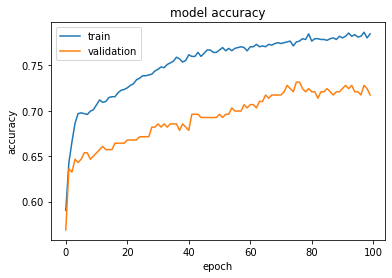

In [176]:
plot_hist(hist_tuner)

In [180]:
# Tentando utilizar RandomSearch

In [182]:
x_train_random, x_val_random, y_train_random, y_val_random = train_test_split(X_train_norm, y_train, test_size=0.20, random_state=42)

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=15,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="spotify",
)
tuner.search_space_summary()
tuner.search(x_train_random, y_train_random, epochs=100, validation_data=(x_val_random, y_val_random))

Trial 15 Complete [00h 00m 26s]
val_accuracy: 0.708480566740036

Best val_accuracy So Far: 0.7455830574035645
Total elapsed time: 00h 07m 16s
INFO:tensorflow:Oracle triggered exit


In [184]:
tuner.results_summary()

Results summary
Results in my_dir\spotify
Showing 10 best trials
Trial summary
Hyperparameters:
units: 448
activation: elu
lr: 0.001968669285522499
Score: 0.7455830574035645
Trial summary
Hyperparameters:
units: 384
activation: elu
lr: 0.0012866407350287678
Score: 0.7367491126060486
Trial summary
Hyperparameters:
units: 192
activation: relu
lr: 0.0009181671251157912
Score: 0.7314487397670746
Trial summary
Hyperparameters:
units: 288
activation: relu
lr: 0.0020634471555626525
Score: 0.7296819984912872
Trial summary
Hyperparameters:
units: 160
activation: relu
lr: 0.0068153431942708865
Score: 0.726148396730423
Trial summary
Hyperparameters:
units: 448
activation: elu
lr: 0.0052652170994473635
Score: 0.7226148247718811
Trial summary
Hyperparameters:
units: 320
activation: relu
lr: 0.00011418280746092354
Score: 0.7155477106571198
Trial summary
Hyperparameters:
units: 384
activation: tanh
lr: 0.003930982461178036
Score: 0.7155477106571198
Trial summary
Hyperparameters:
units: 224
activation

### Criando o modelo com o resumo apresentado pelo RandomSearch

In [185]:
spotify_classificacao_random = tf.keras.Sequential();
spotify_classificacao_random.add(tf.keras.layers.Dense(activation='elu', 
                                                       input_dim=num_features, 
                                                       units=448, 
                                                       kernel_initializer='uniform'))

spotify_classificacao_random.add(tf.keras.layers.Dense(activation='elu', 
                                                       input_dim=num_features, 
                                                       units=448))


spotify_classificacao_random.add(tf.keras.layers.Dense(activation='sigmoid', units=num_classes))
spotify_classificacao_random.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001968669285522499),
                                     loss='binary_crossentropy', 
                                     metrics=['accuracy'])
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelos/spotify_random.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
hist_random = spotify_classificacao_random.fit(X_train_norm, y_train, epochs=100, batch_size=8, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/100
124/141 [=========================>....] - ETA: 0s - loss: 0.6816 - accuracy: 0.6341
Epoch 1: val_accuracy improved from -inf to 0.61131, saving model to modelos\spotify_random.hdf5
141/141 [==============================] - 1s 4ms/step - loss: 0.6779 - accuracy: 0.6312 - val_loss: 0.6432 - val_accuracy: 0.6113
Epoch 2/100
125/141 [=========================>....] - ETA: 0s - loss: 0.6044 - accuracy: 0.6730
Epoch 2: val_accuracy improved from 0.61131 to 0.67138, saving model to modelos\spotify_random.hdf5
141/141 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.6738 - val_loss: 0.6286 - val_accuracy: 0.6714
Epoch 3/100
120/141 [========================>.....] - ETA: 0s - loss: 0.5961 - accuracy: 0.7052
Epoch 3: val_accuracy did not improve from 0.67138
141/141 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7066 - val_loss: 0.6475 - val_accuracy: 0.6678
Epoch 4/100
136/141 [===========================>..] - ETA: 0s - los

141/141 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7606 - val_loss: 0.6124 - val_accuracy: 0.6996
Epoch 30/100
127/141 [==========================>...] - ETA: 0s - loss: 0.4966 - accuracy: 0.7569
Epoch 30: val_accuracy did not improve from 0.71378
141/141 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7633 - val_loss: 0.6639 - val_accuracy: 0.6608
Epoch 31/100
122/141 [========================>.....] - ETA: 0s - loss: 0.5023 - accuracy: 0.7592
Epoch 31: val_accuracy did not improve from 0.71378
141/141 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7544 - val_loss: 0.6279 - val_accuracy: 0.7032
Epoch 32/100
135/141 [===========================>..] - ETA: 0s - loss: 0.5175 - accuracy: 0.7481
Epoch 32: val_accuracy improved from 0.71378 to 0.71731, saving model to modelos\spotify_random.hdf5
141/141 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7518 - val_loss: 0.5871 

Epoch 58/100
135/141 [===========================>..] - ETA: 0s - loss: 0.4244 - accuracy: 0.8019
Epoch 58: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8050 - val_loss: 0.6909 - val_accuracy: 0.7138
Epoch 59/100
140/141 [============================>.] - ETA: 0s - loss: 0.4042 - accuracy: 0.8062
Epoch 59: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8067 - val_loss: 0.6899 - val_accuracy: 0.7138
Epoch 60/100
141/141 [==============================] - ETA: 0s - loss: 0.3957 - accuracy: 0.7970
Epoch 60: val_accuracy did not improve from 0.74205
141/141 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.7970 - val_loss: 0.6698 - val_accuracy: 0.7279
Epoch 61/100
130/141 [==========================>...] - ETA: 0s - loss: 0.3976 - accuracy: 0.8279
Epoch 61: val_accuracy did not improve from 0.74205
141/141

Epoch 87/100
139/141 [============================>.] - ETA: 0s - loss: 0.3288 - accuracy: 0.8498
Epoch 87: val_accuracy did not improve from 0.75265
141/141 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8493 - val_loss: 0.7951 - val_accuracy: 0.7350
Epoch 88/100
126/141 [=========================>....] - ETA: 0s - loss: 0.3046 - accuracy: 0.8720
Epoch 88: val_accuracy did not improve from 0.75265
141/141 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8723 - val_loss: 0.8037 - val_accuracy: 0.7456
Epoch 89/100
125/141 [=========================>....] - ETA: 0s - loss: 0.2963 - accuracy: 0.8640
Epoch 89: val_accuracy did not improve from 0.75265
141/141 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.8555 - val_loss: 0.8902 - val_accuracy: 0.7173
Epoch 90/100
126/141 [=========================>....] - ETA: 0s - loss: 0.3012 - accuracy: 0.8651
Epoch 90: val_accuracy did not improve from 0.75265
141/141

In [186]:
spotify_classificacao_best_random = tf.keras.models.load_model('modelos/spotify_random.hdf5')

In [187]:
test_results_random = spotify_classificacao_best_random.evaluate(X_test_norm, y_test, verbose=1)
print(f'Resultado dos testes - Loss: {test_results_random[0]} - Accuracy: {test_results_random[1]}%')

19/19 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.7129
Resultado dos testes - Loss: 0.648102879524231 - Accuracy: 0.7128713130950928%


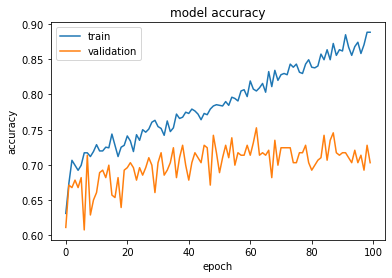

In [188]:
plot_hist(hist_random)

## Conclusão

A melhor acurácia de teste que conseguimos chegar foi de 72,44%<br>
Utilizando o método de Turner do Keras<br>
Sendo praticamente a mesma acurácia que já tínhamos conseguido, mas no primeiro modelo a rede estava mais overfitada<br>
Com Tuner conseguimos diminuir o overfitting no Traino e Validação<br>
Não conseguindo assim chegar a pelo menos 74% do exercício<br>
Tentamos utilizar variável dummies na coluna de Artist, só que a rede não obteve uma boa acurácia, <br>
e então resolvemos não colocar no trabalho<br>